Here I just found the markers and then counted the number of grains in the image with Found Countours function.
The implementation of watershed is in the exercise 3, as specified in the pdf. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [3]:
original_coffee = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_segment/coffee_grains.jpg")

In [4]:
coffee = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_segment/coffee_grains.jpg", cv2.IMREAD_GRAYSCALE)

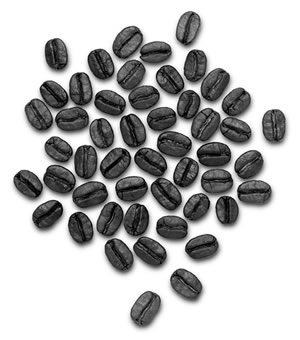

In [5]:
cv2_imshow(coffee)

In [6]:
def treshold(treshold, input_img):

  nrows = input_img.shape[0]
  ncols = input_img.shape[1]
  output_img = np.zeros((nrows, ncols))

  for i in range(nrows):
    for j in range(ncols):

      if input_img[i][j] >= treshold:
        output_img[i][j] = 255

  return output_img

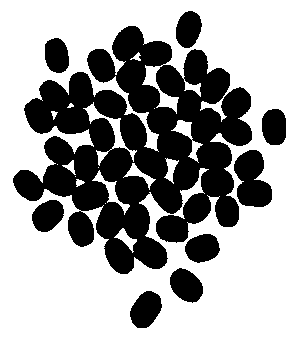

In [24]:
thresh = treshold(180, coffee)
cv2_imshow(thresh)

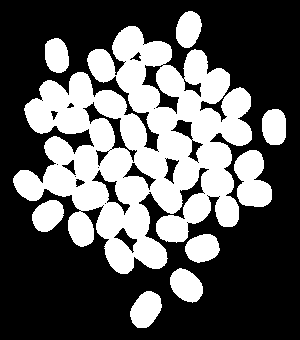

In [41]:
color_inv = 255 - thresh
cv2_imshow(color_inv)

In [26]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [27]:
def erosion(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      minimum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel < minimum):
            #update the minimum
            minimum = pixel
      output_img[r][c] = minimum

  return output_img

In [28]:
def dilation(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      maximum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel > maximum):
            #update the maximum
            maximum = pixel
      output_img[r][c] = maximum

  return output_img

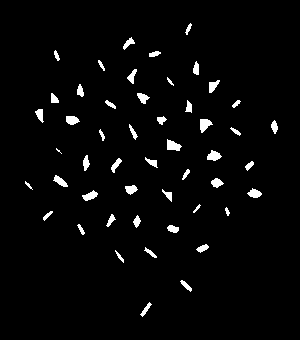

In [43]:
dil = erosion(color_inv, 8)
cv2_imshow(dil)

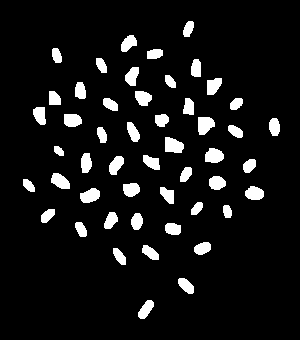

In [44]:
eros = dilation(dil, 2)
cv2_imshow(eros)

In [46]:
array = np.array(eros, np.uint8)

In [47]:
contours, _ = cv2.findContours(array, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [48]:
len(contours)

50